In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress

In [5]:
#import the dataset 'amazon_categories'
categories_df = pd.read_csv('Amazon US/amazon_categories.csv')
categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             248 non-null    int64 
 1   category_name  248 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.0+ KB


In [6]:
#import the dataset 'amazon_products'
products_df = pd.read_csv('Amazon US/amazon_products.csv')
products_df.info()
products_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   asin               1048575 non-null  object 
 1   title              1048575 non-null  object 
 2   imgUrl             1048575 non-null  object 
 3   productURL         1048575 non-null  object 
 4   stars              1048575 non-null  float64
 5   reviews            1048575 non-null  int64  
 6   price              1048575 non-null  float64
 7   listPrice          1048575 non-null  float64
 8   category_id        1048575 non-null  int64  
 9   isBestSeller       1048575 non-null  bool   
 10  boughtInLastMonth  1048575 non-null  int64  
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 81.0+ MB


,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400


In [7]:
#check for null values in the data
products_df.isnull().sum()

asin                 0
title                0
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
listPrice            0
category_id          0
isBestSeller         0
boughtInLastMonth    0
dtype: int64

In [8]:
#Rename the id column of category table before merging tables
categories_df = categories_df.rename(columns={'id': 'category_id'})
categories_df.head()




,category_id,category_name
0,1,Beading & Jewelry Making
1,2,Fabric Decorating
2,3,Knitting & Crochet Supplies
3,4,Printmaking Supplies
4,5,Scrapbooking & Stamping Supplies


In [9]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   asin               1048575 non-null  object 
 1   title              1048575 non-null  object 
 2   imgUrl             1048575 non-null  object 
 3   productURL         1048575 non-null  object 
 4   stars              1048575 non-null  float64
 5   reviews            1048575 non-null  int64  
 6   price              1048575 non-null  float64
 7   listPrice          1048575 non-null  float64
 8   category_id        1048575 non-null  int64  
 9   isBestSeller       1048575 non-null  bool   
 10  boughtInLastMonth  1048575 non-null  int64  
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 81.0+ MB


In [10]:
categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_id    248 non-null    int64 
 1   category_name  248 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.0+ KB


In [11]:
#Change 'category_id' in products_df to object
#products_df['category_id'] = products_df['category_id'].astype('object')
#categories_df['category_id'] = categories_df['category_id'].astype('object')

#merge data sets in 'category id'
combined_df = pd.merge(products_df, categories_df, on='category_id', how='left')
combined_df.head()


,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000,Suitcases
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000,Suitcases
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300,Suitcases
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400,Suitcases
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400,Suitcases


In [16]:
#pd.set_option('display.float_format', '{:.2f}'.format)
#pd.describe()

In [17]:
# Check for any remaining null values
print(combined_df.isnull().sum())

# Check unique values in category_id
print(combined_df['category_id'].nunique())

# Check the range of boughtInLastMonth
print(combined_df['boughtInLastMonth'].min(), combined_df['boughtInLastMonth'].max())

asin                 0
title                0
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
listPrice            0
category_id          0
isBestSeller         0
boughtInLastMonth    0
category_name        0
dtype: int64
190
0 100000


C:\Users\fette00w\AppData\Local\Temp\ipykernel_28808\1055942159.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette=custom_palette)


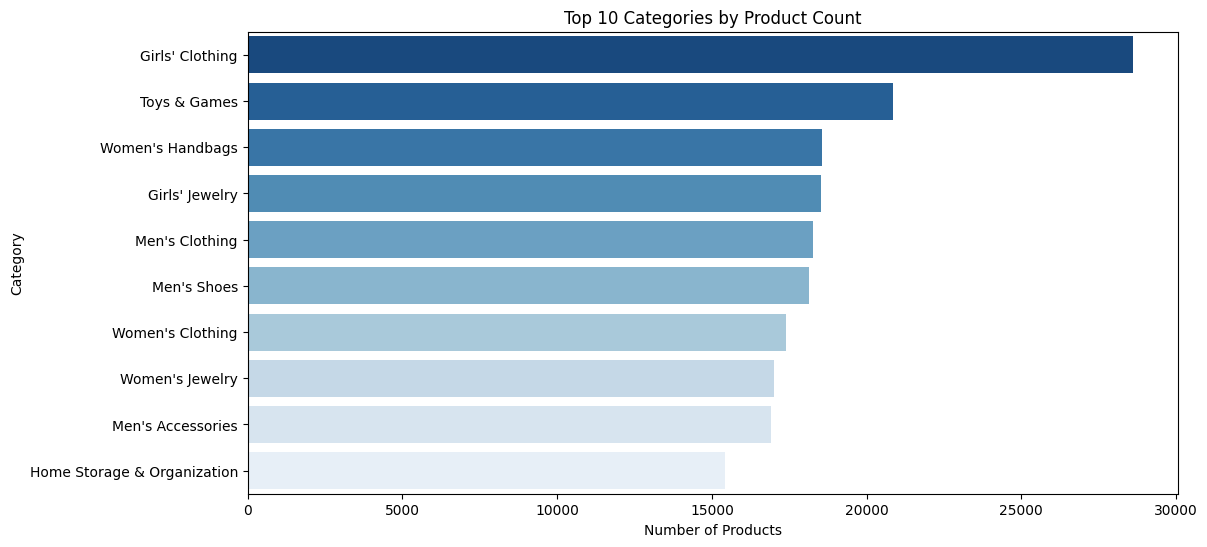

In [18]:
#create chart of top 10 categories by total count of categories 
custom_palette = sns.color_palette("Blues_r", n_colors=10)

plt.figure(figsize=(12, 6))
top_categories = combined_df['category_name'].value_counts().nlargest(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette=custom_palette)
plt.title('Top 10 Categories by Product Count')
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.show()

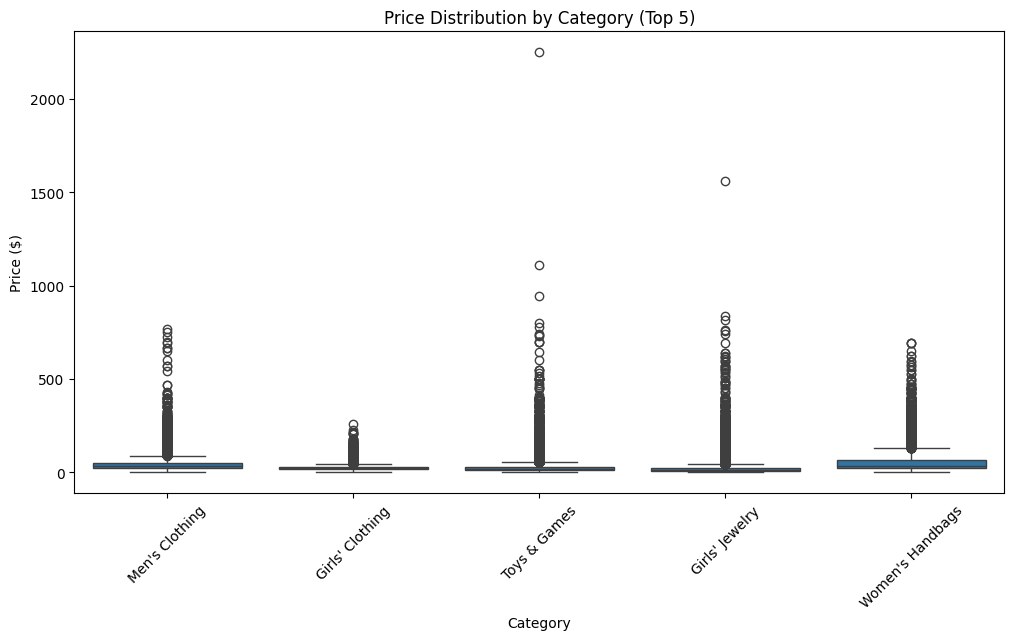

In [20]:
#create box plots of top 5 product categories versus price
plt.figure(figsize=(12, 6))
top_5_categories = combined_df['category_name'].value_counts().nlargest(5).index
sns.boxplot(x='category_name', y='price', data=combined_df[combined_df['category_name'].isin(top_5_categories)])
plt.title('Price Distribution by Category (Top 5)')
plt.xlabel('Category')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

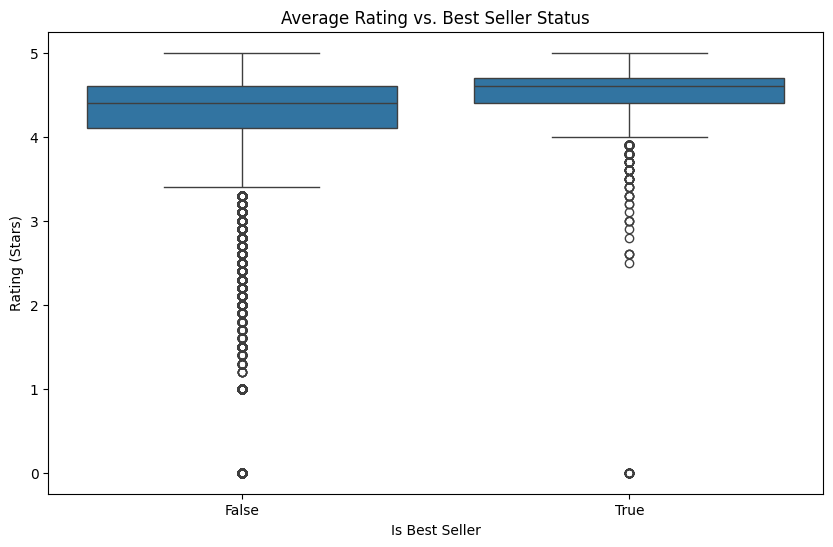

In [23]:
#create box plots of best sellers versus ratings
custom_palette = sns.color_palette("Blues_r", n_colors=2)
plt.figure(figsize=(10, 6))
sns.boxplot(x='isBestSeller', y='stars', data=combined_df)
plt.title('Average Rating vs. Best Seller Status')
plt.xlabel('Is Best Seller')
plt.ylabel('Rating (Stars)')
plt.show()

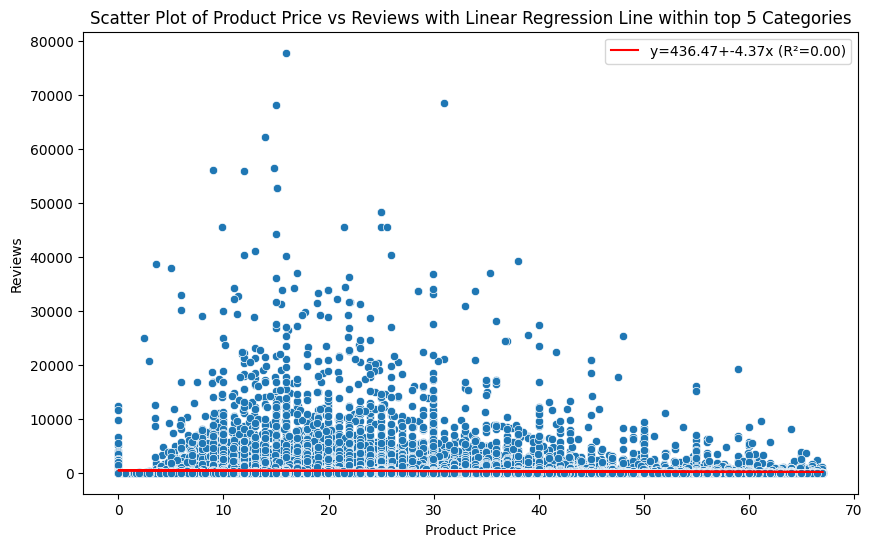

Linear Equation: y = 436.47 + -4.37x
R-value: -0.03459180059335417


In [35]:
#create scatter plot of Product price vs reviews

# Filter data for top 5 "category_id" according to "boughtInLastMonth"
#top_5_categories = combined_df['category_name'].value_counts().nlargest(5).index
#top_categories = df.groupby('category_name').value_counts().nlargest(5).index
filtered_df = combined_df[combined_df['category_name'].isin(top_5_categories)]

# Remove outliers from "product price" column
Q1 = filtered_df['price'].quantile(0.25)
Q3 = filtered_df['price'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = filtered_df[(filtered_df['price'] >= (Q1 - 1.5 * IQR)) & (filtered_df['price'] <= (Q3 + 1.5 * IQR))]

# Create scatter plot of "product price" versus "reviews"
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='price', y='reviews')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(filtered_df['price'], filtered_df['reviews'])

# Plot the regression line
plt.plot(filtered_df['price'], intercept + slope * filtered_df['price'], 'r', label=f'y={intercept:.2f}+{slope:.2f}x (R²={r_value**2:.2f})')

# Add labels and title
plt.xlabel('Product Price')
plt.ylabel('Reviews')
plt.title('Scatter Plot of Product Price vs Reviews with Linear Regression Line within top 5 Categories')
plt.legend()

# Show the plot
plt.show()

# Print the linear equation and r-value
print(f'Linear Equation: y = {intercept:.2f} + {slope:.2f}x')
print(f'R-value: {r_value}')

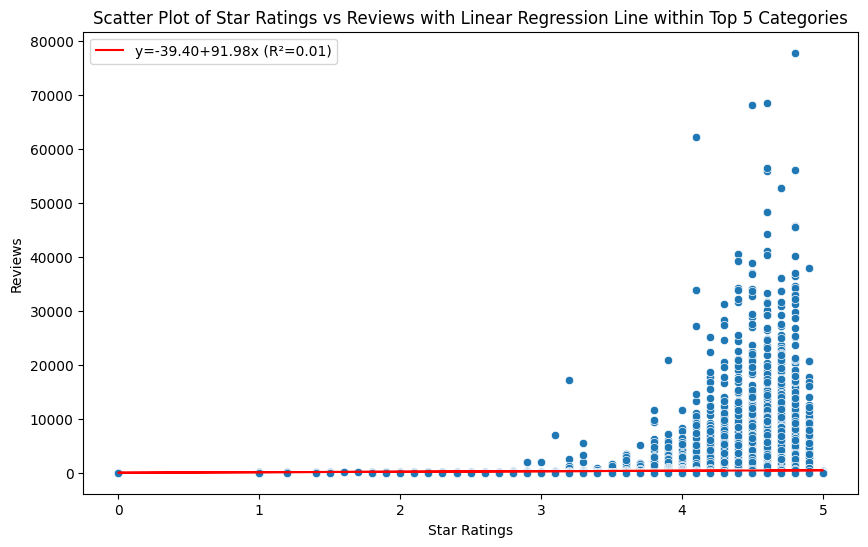

Linear Equation: y = -39.40 + 91.98x
R-value: 0.07654493864647918


In [36]:
#create scatter plot of Star Ratings vs reviews

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='stars', y='reviews')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(filtered_df['stars'], filtered_df['reviews'])

# Plot the regression line
plt.plot(filtered_df['stars'], intercept + slope * filtered_df['stars'], 'r', label=f'y={intercept:.2f}+{slope:.2f}x (R²={r_value**2:.2f})')

# Add labels and title
plt.xlabel('Star Ratings')
plt.ylabel('Reviews')
plt.title('Scatter Plot of Star Ratings vs Reviews with Linear Regression Line within Top 5 Categories')
plt.legend()

# Show the plot
plt.show()

# Print the linear equation and r-value
print(f'Linear Equation: y = {intercept:.2f} + {slope:.2f}x')
print(f'R-value: {r_value}')